# Session 2 Exercises Solutions

## Your name here

## Working with Spikes Data Part 2

Recall Working with Spikes Data from the previous session:

You worked with an array of spikes counts where the rows were different trials, the columns are different time bins, and the entries were the spike counts during that time bin in that trial. Each time bin is 1 ms.

This data was simulated but mimicked a situation where a monkey was performing a task where they make repeated reaching movements to the same target. The data was "recorded" from a neuron in the monkey's motor cortex.


We are going to work with data in the same format again. We again have an array called `spikes`, but now we have 1000 trials. We have 1500 time bins and in each trial the reach movement onset happens at the 750th time bin.

The only change is that the reach movement on each trial will be to one of 8 target options, instead of the same target each time. We are going to refer to these target options by the angle of the reach to them.  `trial_angles` is an array of shape (1000,). Each entry contains the reaching angle on that trial.

The next cell loads in this data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import requests
import io

r = requests.get('https://osf.io/m5tj3/download')
spikes = np.load(io.BytesIO(r.content))

r = requests.get('https://osf.io/af84k/download')
trial_angles = np.load(io.BytesIO(r.content))


dt = 0.001 # in seconds, each time bin is 1 ms

1. What are the 8 different reach options (aka the 8 different angles of reach)?

Print an array with the 8 different reach angles



In [ ]:
# @markdown Click here for hint

"""
Hint: trial_angles contains this information but it is
1000 entries long with repeats of each reach.
Use google to figure out how to get the unique values
(include the word numpy in your search)
""";

In [ ]:
print(np.unique(trial_angles))

[  0  45  90 135 180 225 270 315]


2. Use Boolean indexing to get the trials where the monkey was reaching to a target at 0 degrees. Save this array as a variable called `spikes_for_angle_0`.



In [ ]:
spikes_for_angle_0 = spikes[trial_angles==0, :]

3. There should be 125 trials with a reach to angle of 0, so the array from Q2 should be 125 by 1500. Check the shape of `spikes_for_angle_0_trials` to make sure it is correct!

In [ ]:
np.shape(spikes_for_angle_0)

(125, 1500)

4. Compute the average firing rate over time of this neuron during trials to angle 0 (i.e. the avearge spike count per time bin). No need to convert to spikes per second, you can leave as spikes per time bin.

Hint: you did this in the session 1 exercises

In [ ]:
np.mean(spikes_for_angle_0, axis=0)

array([0.   , 0.016, 0.032, ..., 0.016, 0.008, 0.04 ])

5. Plot the average firing rate over time of this neuron during trials to angle 0. Label the x and y axis and add a title.

[Text(0.5, 0, 'Time bins'), Text(0, 0.5, 'Firing rate (spikes/bin)')]

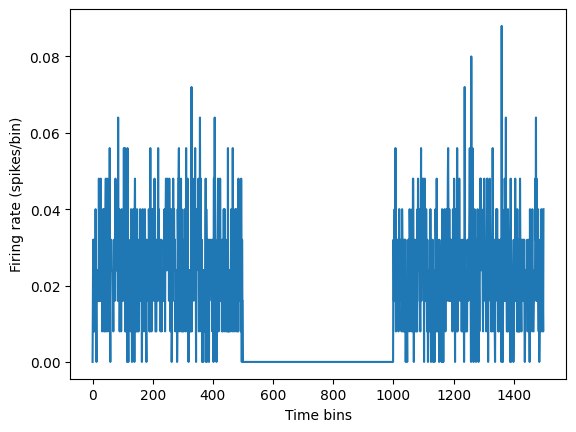

In [ ]:
fig, ax = plt.subplots()

ax.plot(np.mean(spikes_for_angle_0, axis=0))
ax.set(xlabel='Time bins',
       ylabel = 'Firing rate (spikes/bin)')

6. (Text answer) What happens to the activity of this neuron around movement reach onset (which happens at the 750th time bin)

7. We want to compute a single number that summarizes the neural firing rate during reaches to this angle. We only want to consider the time period immediately around the movement onset, so in time bins 500 up to 1000. Can you figure out how to get the average spike count in time bins 500 up to 1000 across all trials to reach angle of 0? Try to do it in 1 to 2 lines of code, starting with the original `spikes` data.



In [ ]:
reach_angle = 0

np.mean(spikes[trial_angles==reach_angle, 500:1000])

0.0

8. Can you convert this to an average firing rate in spikes per second?

In [ ]:
np.mean(spikes[trial_angles==reach_angle, 500:1000])/dt

0.0

9. What is the single average firing rate in spikes per second for trials where the reach is to angle 135?

In [ ]:
reach_angle = 135
np.mean(spikes[trial_angles==reach_angle, 500:1000])/dt

92.256

10. (Text answer) Given the two numbers in Q8 and 9, do you think this neuron's activity could be correlated with (i.e. varies with) the direction of reach?

## Mystery arrays

### Array 1

The cell below loads in mystery data into an array called `x`. Try to figure out the "secret" contained in this data by plotting it in different ways.

In [ ]:
import requests
import io

r = requests.get('https://osf.io/3sd2p/download')

x = np.load(io.BytesIO(r.content))

In [ ]:
x.shape

(142, 2)

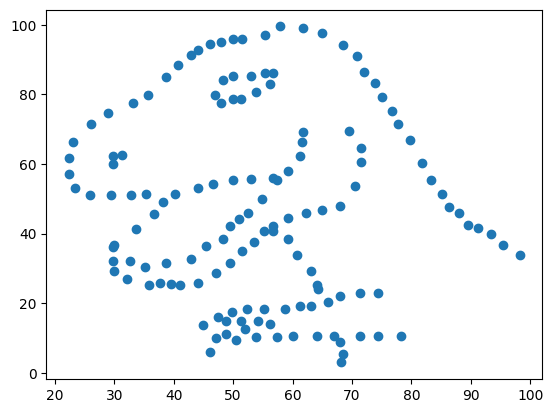

In [ ]:
plt.plot(x[:, 0], x[:, 1], 'o')

What is the secret in this data?

## Array 2

The cell below loads in mystery data into an array called x. Try to figure out how this data was generated by plotting it in different ways or looking at the data in other ways.

In [ ]:
# @markdown Hint 1

# Try to plot it as an image. Make sure to add a colorbar!



In [ ]:
# @markdown Hint 2

# Try plotting all the values in a histogram

In [ ]:
import requests
import io

r = requests.get('https://osf.io/2saj7/download')

y = np.load(io.BytesIO(r.content))

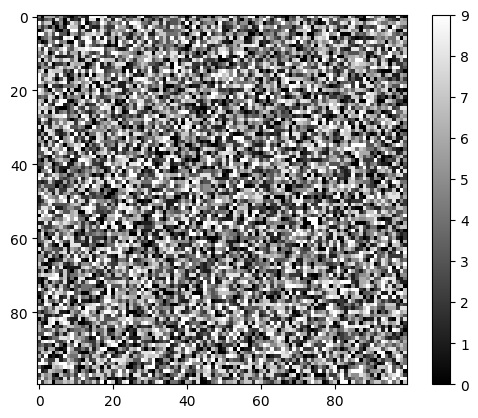

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(y, cmap = 'gray')
plt.colorbar(im)

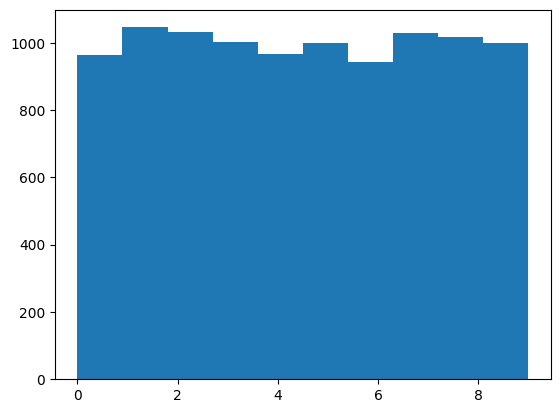

In [ ]:
fig, ax = plt.subplots()
ax.hist(np.reshape(y,  (-1,)));

This data was drawn from a uniform distribution of integers. In other words, it is an integer bewteen 0 and 9 with equal probability of each.